<H1>Employee Attrition Analysis</H1>

<H2>Data Loading</H2>

In [1]:
#Importing libraries needed and set configuration to show max rows & columns
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
#Load attrition dataset into dataframe
attrition_df = pd.read_excel ("Attrition.xlsx") 
attrition_df.head()



,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,1,6,3,3,2,2,2,2


<H2> Data Distribution Analysis </H2>

No     1233
Yes     237
Name: Attrition, dtype: int64


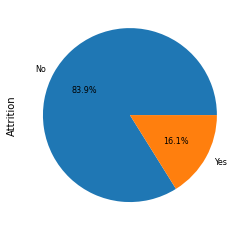

In [2]:
#Checking data distribution for attrition - target variable
attrition_df['Attrition'].value_counts().plot(kind='pie',autopct='%1.1f%%', fontsize=8)
print(attrition_df['Attrition'].value_counts())



<H2>Exploratory Data Analysis & Processing</H2>

In [3]:
# Explore on the data & print the information
print("Total number of dataset", attrition_df.shape[0])
print("Total number of features", attrition_df.shape[1])
print("Attrition DataSet Information")
attrition_df.info()
attrition_df.dtypes


# Remove "NaN" tuple and convert the data type of the column to integer
attrition_df.DistanceFromHome = pd.to_numeric(attrition_df.DistanceFromHome, errors="coerce")
attrition_df = attrition_df[attrition_df['DistanceFromHome'].notna()]
attrition_df['DistanceFromHome'] = attrition_df['DistanceFromHome'].astype(int)
attrition_df.Education = pd.to_numeric(attrition_df.Education, errors="coerce")
attrition_df = attrition_df[attrition_df['Education'].notna()]
attrition_df['Education'] = attrition_df['Education'].astype(int)
attrition_df.HourlyRate = pd.to_numeric(attrition_df.HourlyRate, errors="coerce")
attrition_df = attrition_df[attrition_df['HourlyRate'].notna()]
attrition_df['HourlyRate'] = attrition_df['HourlyRate'].astype(int)
attrition_df.MonthlyRate = pd.to_numeric(attrition_df.MonthlyRate, errors="coerce")
attrition_df = attrition_df[attrition_df['MonthlyRate'].notna()]
attrition_df['MonthlyRate'] = attrition_df['MonthlyRate'].astype(int)
attrition_df.MonthlyIncome = pd.to_numeric(attrition_df.MonthlyIncome, errors="coerce")
attrition_df = attrition_df[attrition_df['MonthlyIncome'].notna()]
attrition_df['MonthlyIncome'] = attrition_df['MonthlyIncome'].astype(int)

print(attrition_df.dtypes)

# Check for null entries 
print(attrition_df.isnull().sum())

attrition_df.describe()



Total number of dataset 1470
Total number of features 33
Attrition DataSet Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   object
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   object
 12  JobInvolvement            1470 non-null   int

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000
mean,36.966874,800.819876,9.197378,2.913043,1033.525190,2.721187,65.906142,2.729469,2.067633,2.724638,6523.579710,14348.799172,2.693582,15.202208,3.153209,2.714286,0.790890,11.282264,2.799862,2.760524,7.006211,4.231194,2.169772,4.127674
std,9.128019,403.564814,8.084650,1.021537,601.236872,1.093476,20.330882,0.712919,1.110402,1.102211,4718.152461,7115.219968,2.500822,3.661596,0.360313,1.080245,0.852215,7.784279,1.291162,0.708035,6.114184,3.628991,3.197918,3.570654
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,498.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2926.000000,8192.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,797.000000,7.000000,3.000000,1034.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4936.000000,14255.000000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1563.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8392.000000,20471.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


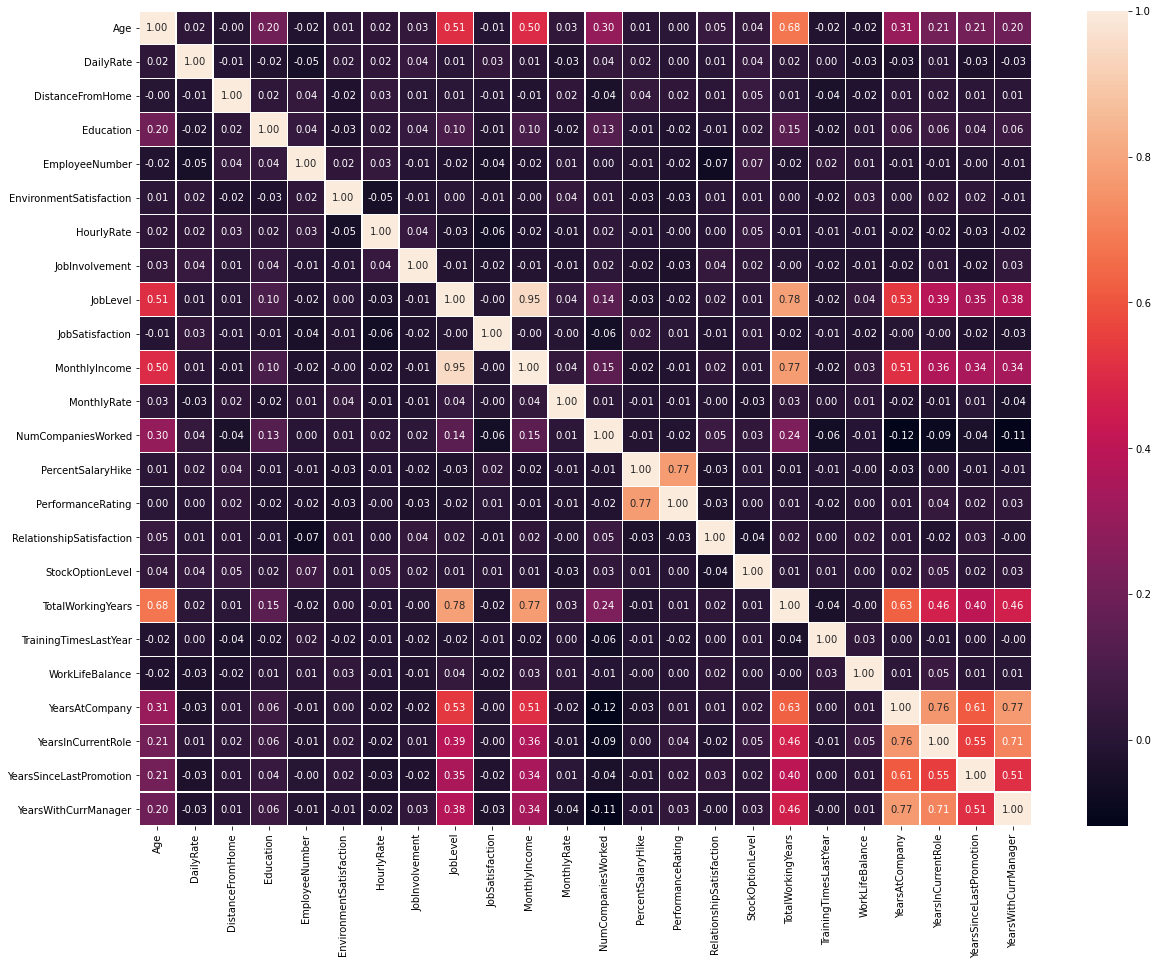

In [6]:
# Let's identify the target variable and other features how they are corelated using coefficient matrix
import seaborn as sns
attrition_corr_matrix=attrition_df.corr()
fig,attritionmatrix=plt.subplots(figsize=(20,15))
attritionmatrix=sns.heatmap(attrition_corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

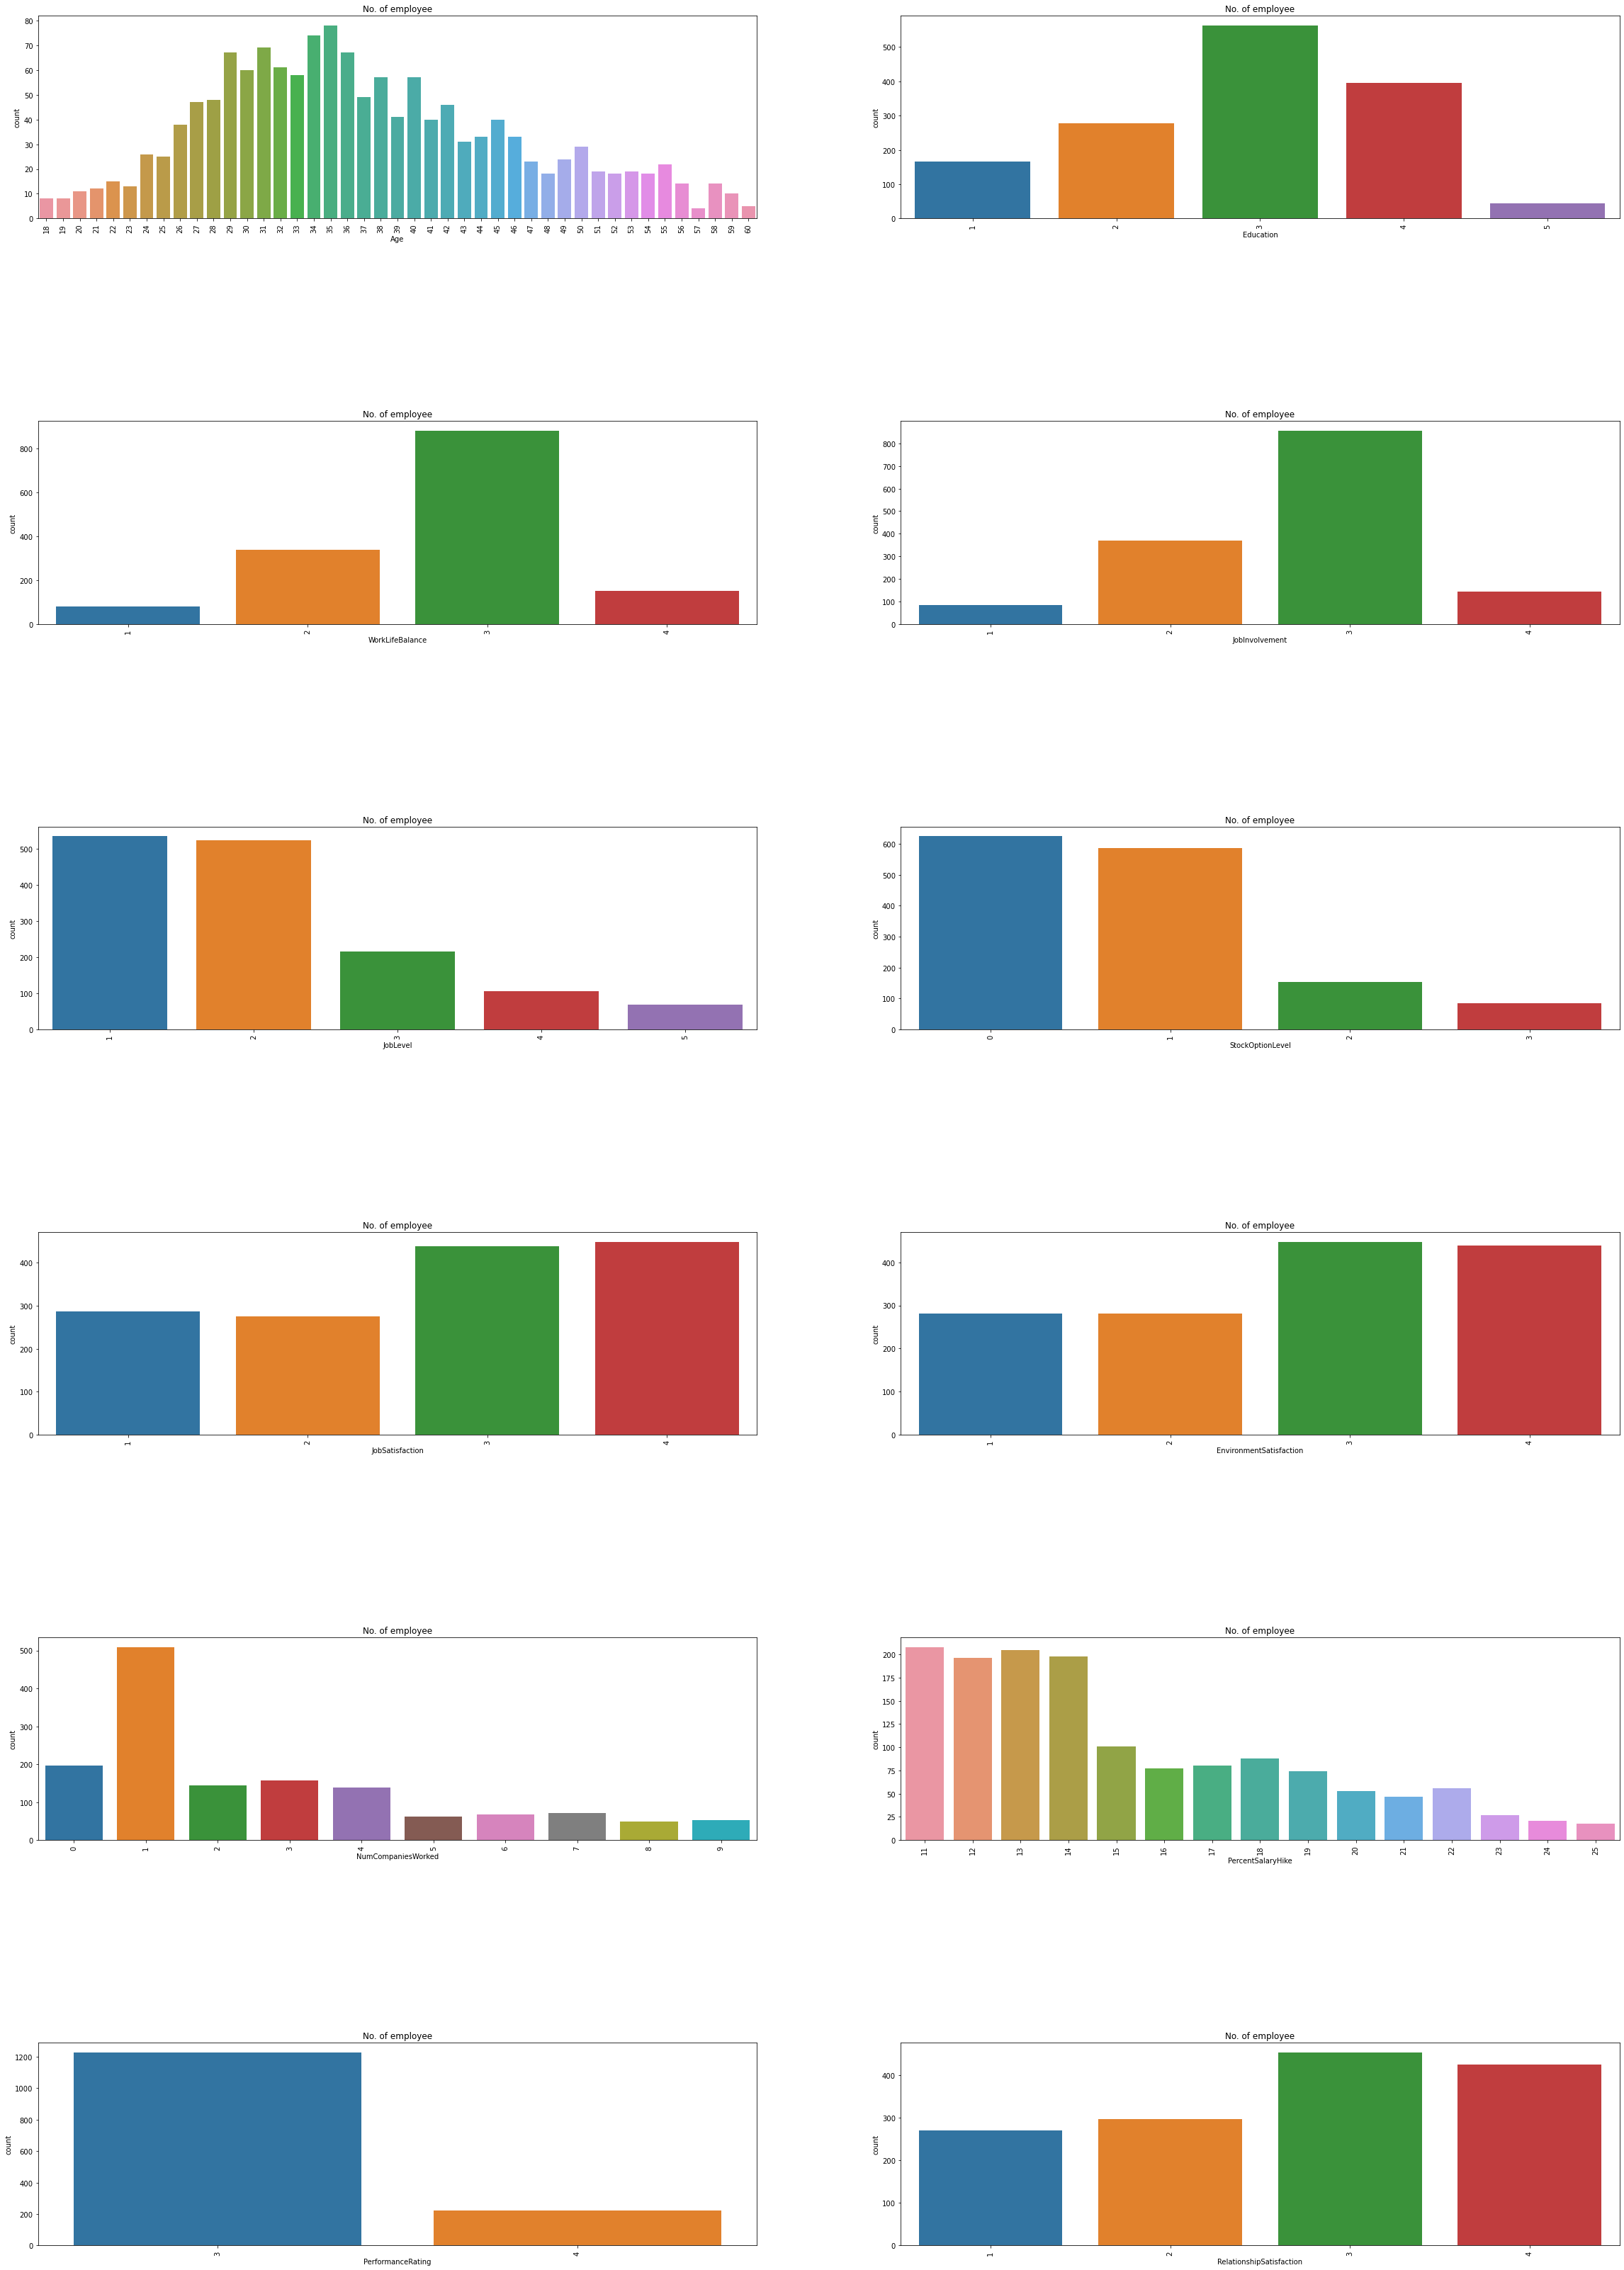

In [7]:
# Let's look at distribution of data for numerical values
import seaborn as sns
features=['Age','Education','WorkLifeBalance','JobInvolvement','JobLevel','StockOptionLevel','JobSatisfaction','EnvironmentSatisfaction', 'NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction']
attrition_figure=plt.subplots(figsize=(40,100))
for i, j in enumerate(features):
    plt.subplot(10, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = attrition_df)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

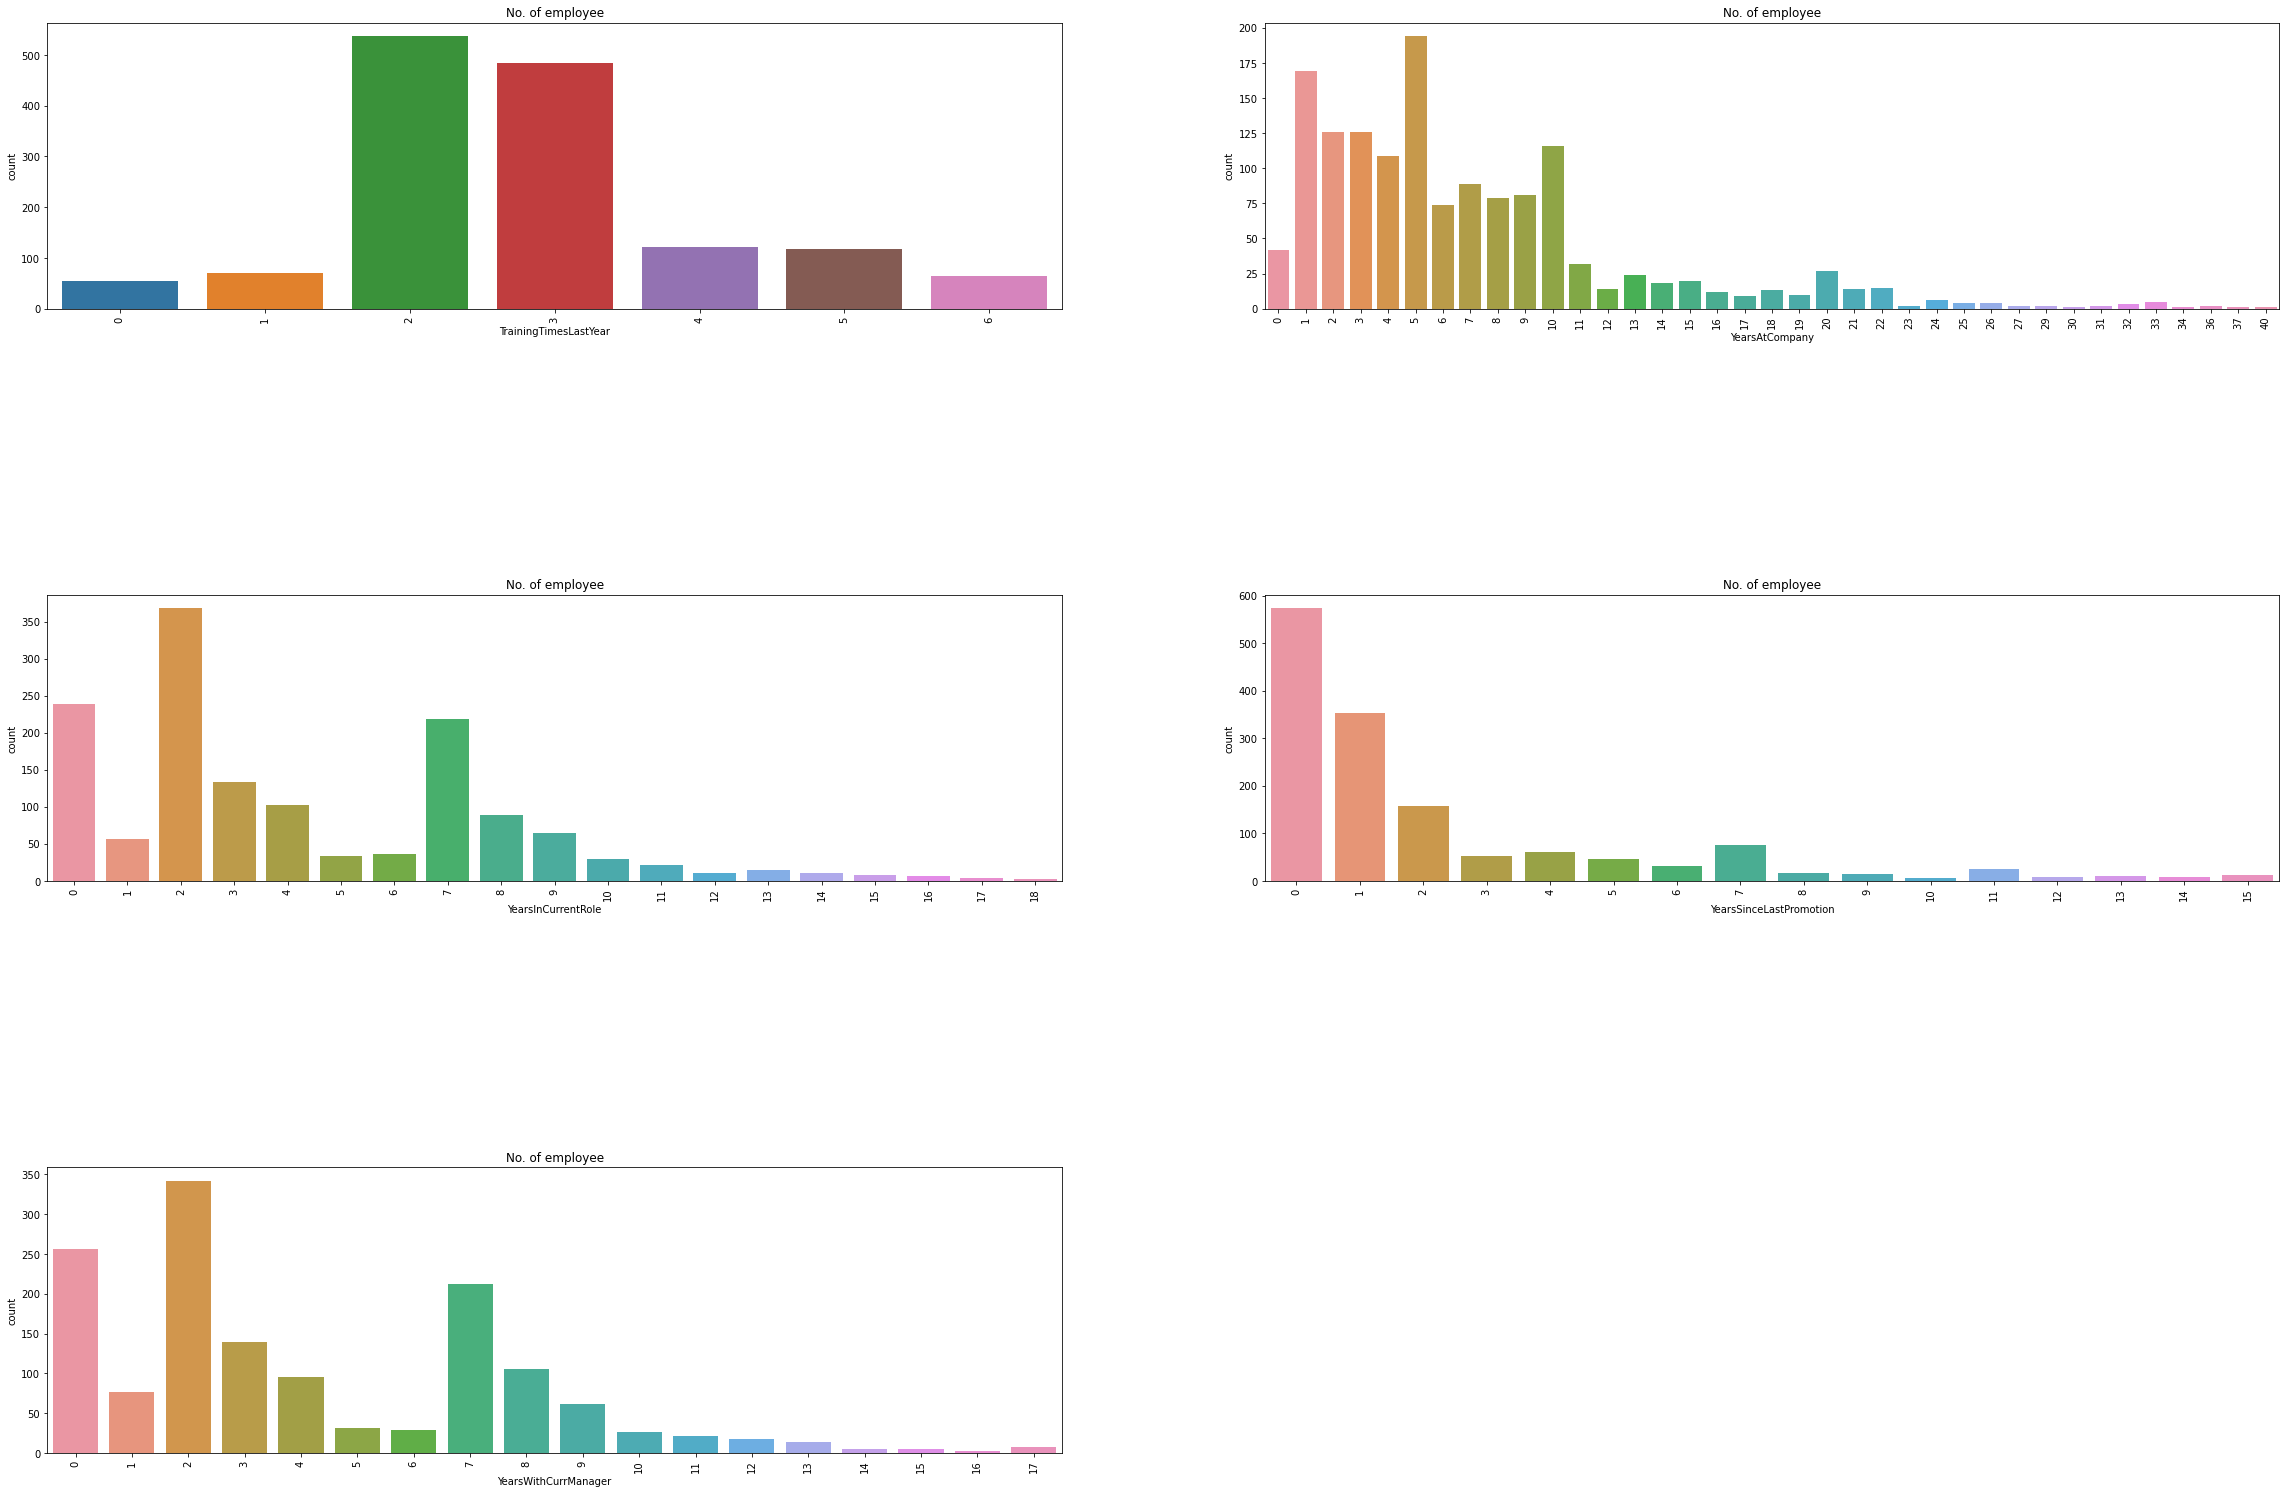

In [8]:
# Let's look at distribution of data for discrete numerical values
import seaborn as sns
features=['TrainingTimesLastYear','YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
attrition_figure=plt.subplots(figsize=(40,100))
for i, j in enumerate(features):
    plt.subplot(10, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = attrition_df)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

<AxesSubplot:title={'center':'BusinessTravel'}>

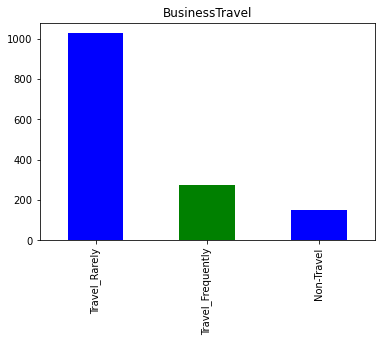

In [9]:
# Let's look at distribution of data for categorical - Business Travel feature
attrition_df['BusinessTravel'].value_counts().plot(kind='bar',color=['Blue','Green'],title="BusinessTravel")


<AxesSubplot:title={'center':'EducationField'}>

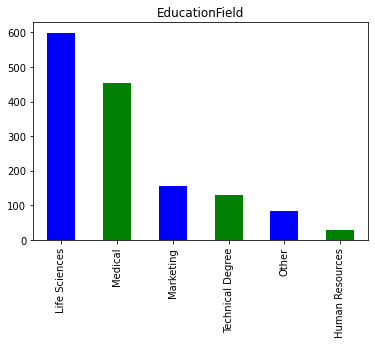

In [10]:
# Let's look at distribution of data for categorical - Education Field feature
attrition_df['EducationField'].value_counts().plot(kind='bar',color=['Blue','Green'],title="EducationField")


<AxesSubplot:title={'center':'Department'}>

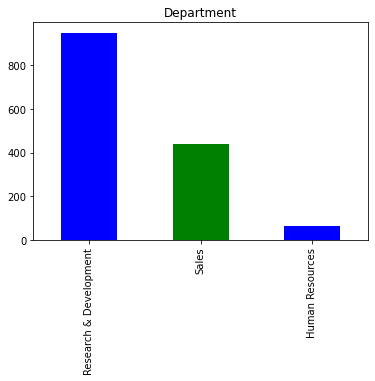

In [11]:
# Let's look at distribution of data for categorical - Department feature
attrition_df['Department'].value_counts().plot(kind='bar',color=['Blue','Green'],title="Department")


<AxesSubplot:title={'center':'Gender'}>

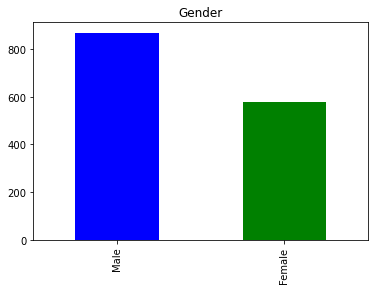

In [12]:
# Let's look at distribution of data for categorical - gender feature
attrition_df['Gender'].value_counts().plot(kind='bar',color=['Blue','Green'],title="Gender")


<AxesSubplot:title={'center':'MaritalStatus'}>

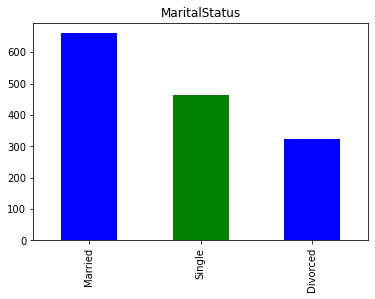

In [13]:
# Let's look at distribution of data for categorical - Marital Status feature
attrition_df['MaritalStatus'].value_counts().plot(kind='bar',color=['Blue','Green'],title="MaritalStatus")


<AxesSubplot:title={'center':'Over18'}>

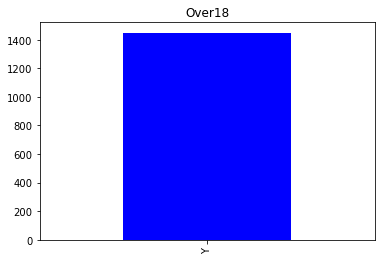

In [14]:
# Let's look at distribution of data for categorical - Over18 feature
attrition_df['Over18'].value_counts().plot(kind='bar',color=['Blue','Green'],title="Over18")


<AxesSubplot:title={'center':'OverTime'}>

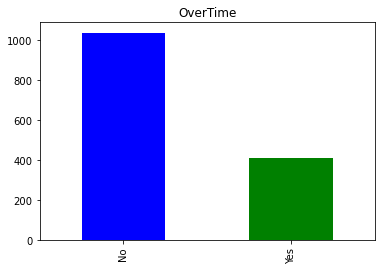

In [15]:
# Let's look at distribution of data for categorical - OverTime feature
attrition_df['OverTime'].value_counts().plot(kind='bar',color=['Blue','Green'],title="OverTime")

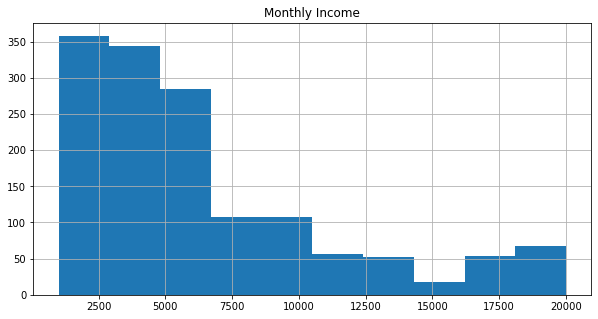

In [16]:
#Plot the distribution of the continuous data - Monthly Income 

attrition_df['MonthlyIncome'].hist(bins=10,figsize=(10,5))
plt.title("Monthly Income")
plt.show()


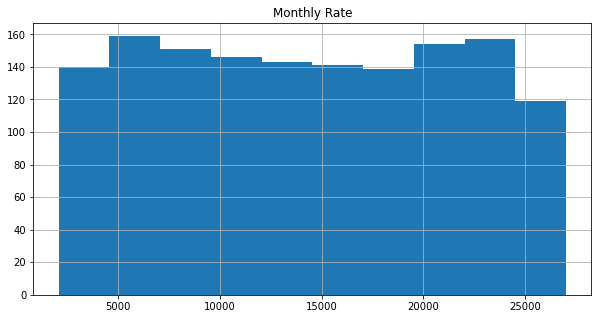

In [17]:
#Plot the distribution of the continuous data - Monthly Rate 
attrition_df['MonthlyRate'].hist(bins=10,figsize=(10,5))
plt.title("Monthly Rate")
plt.show()


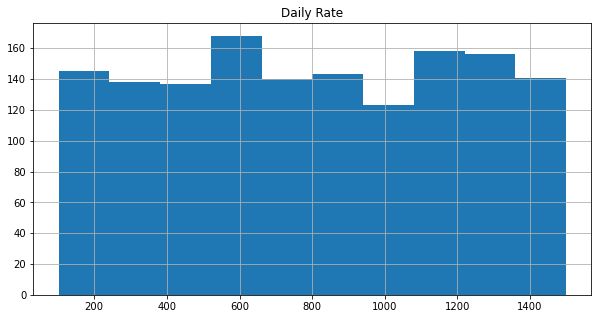

In [18]:
#Plot the distribution of the continuous data - Daily Rate 
attrition_df['DailyRate'].hist(bins=10,figsize=(10,5))
plt.title("Daily Rate")
plt.show()

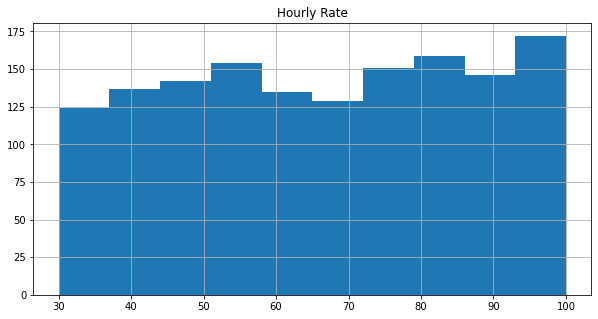

In [19]:
#Plot the distribution of the continuous data - Hourly rate
attrition_df['HourlyRate'].hist(bins=10,figsize=(10,5))
plt.title("Hourly Rate")
plt.show()

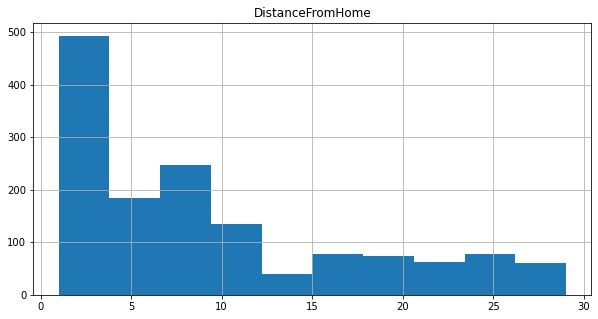

In [20]:
#Plot the distribution of the continuous data - Distance from Home
attrition_df['DistanceFromHome'].hist(bins=10,figsize=(10,5))
plt.title("DistanceFromHome")
plt.show()

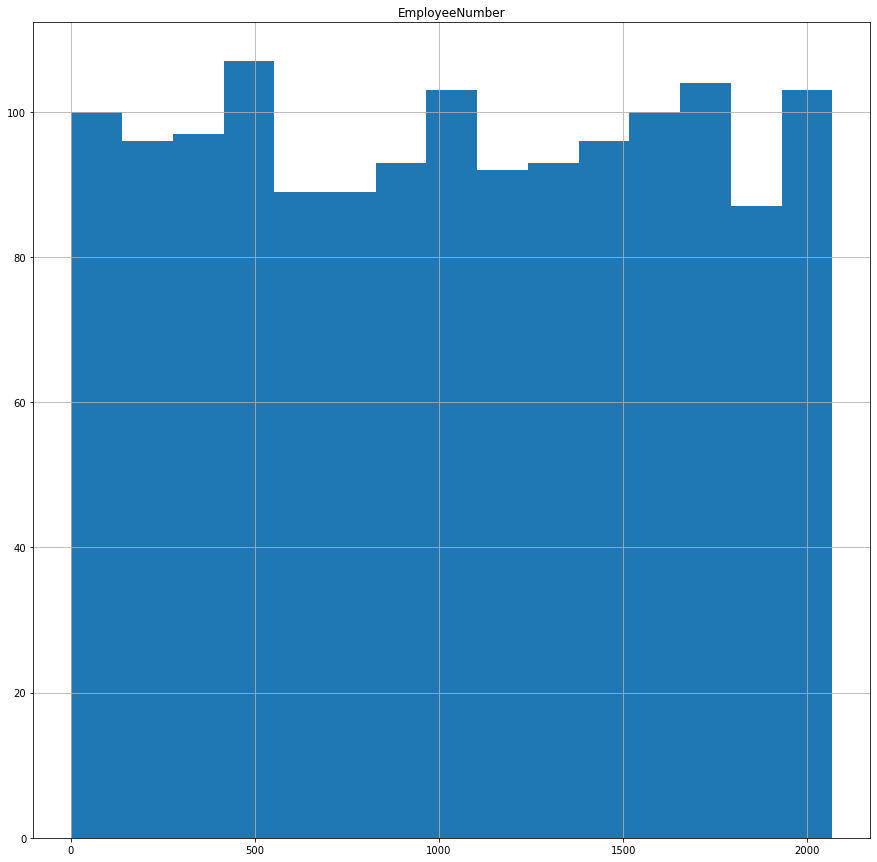

In [21]:
#Plot the distribution of the continuous data - EmployeeNumber
attrition_df['EmployeeNumber'].hist(bins=15,figsize=(15,15))
plt.title("EmployeeNumber")
plt.show()

In [22]:
#Define function for crosstab plot
def crosstabplot(attrition_df,feature,target):
    barplot = pd.crosstab(attrition_df[feature],attrition_df[target]).plot(kind="bar",figsize=(10,6))
    plt.title(feature+ " vs "+target)
    plt.xlabel(feature)
    plt.ylabel("No of people who left based on "+target)
    plt.legend(["No","Yes"])
    plt.xticks(rotation=0)

    for p in barplot.patches:
        barplot.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

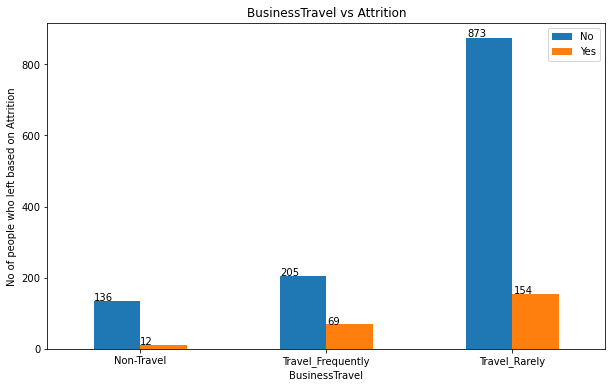

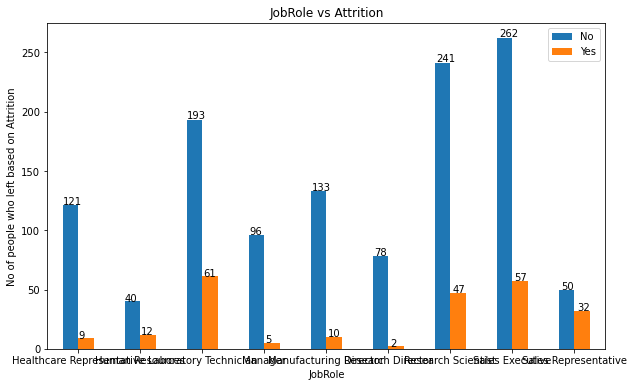

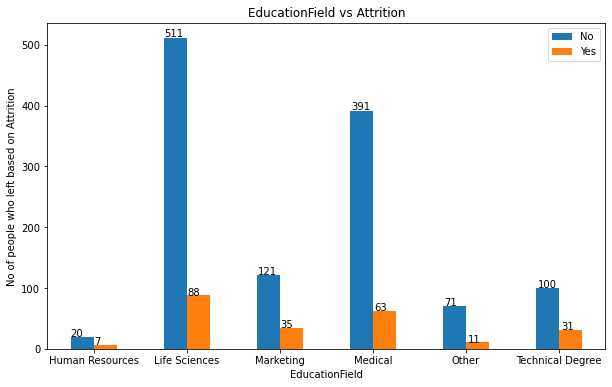

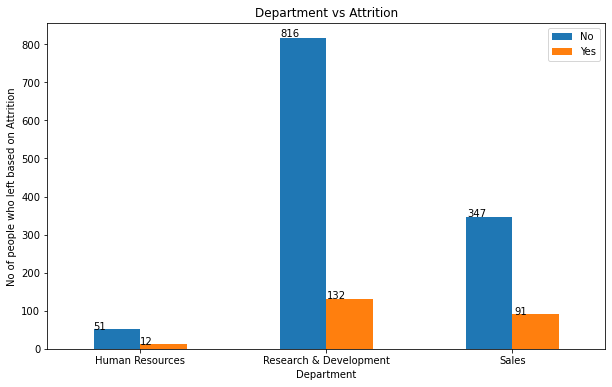

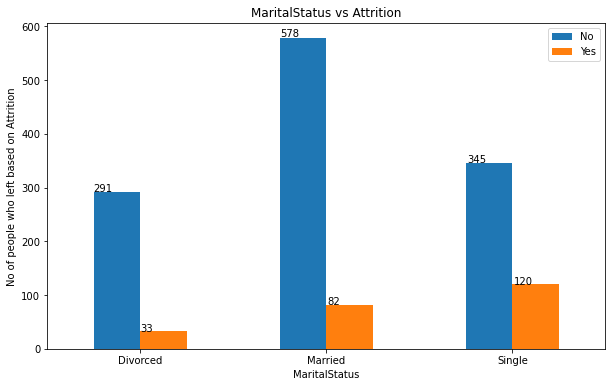

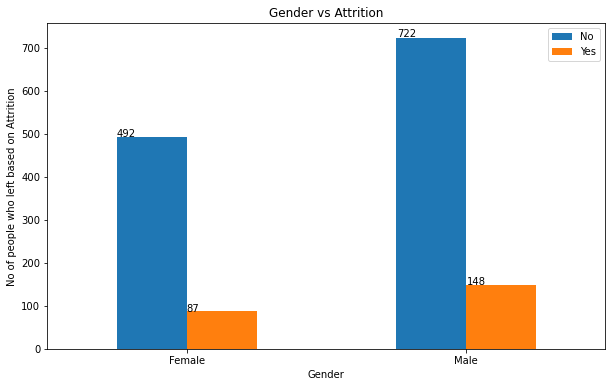

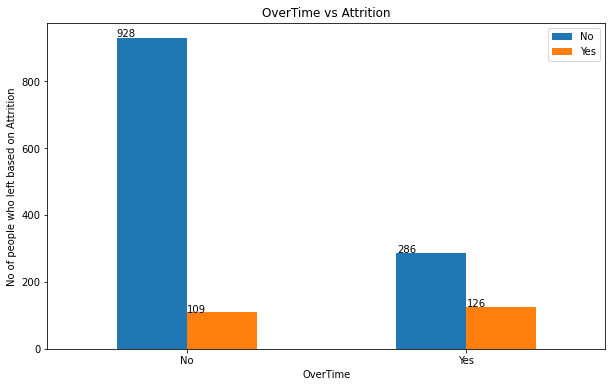

In [23]:
#Plots for Categorical data
crosstabplot(attrition_df,'BusinessTravel','Attrition')
crosstabplot(attrition_df,'JobRole','Attrition')
crosstabplot(attrition_df,'EducationField','Attrition')
crosstabplot(attrition_df,'Department','Attrition')
crosstabplot(attrition_df,'MaritalStatus','Attrition')
crosstabplot(attrition_df,'Gender','Attrition')
crosstabplot(attrition_df,'OverTime','Attrition')

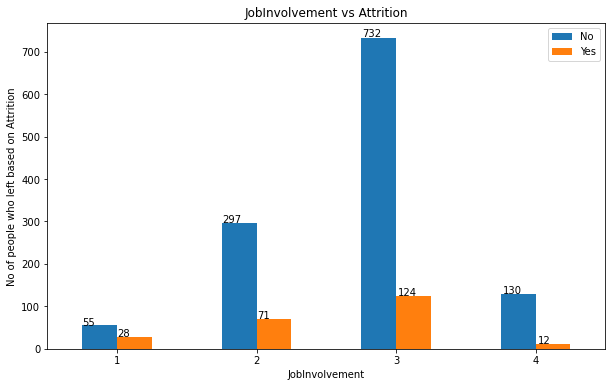

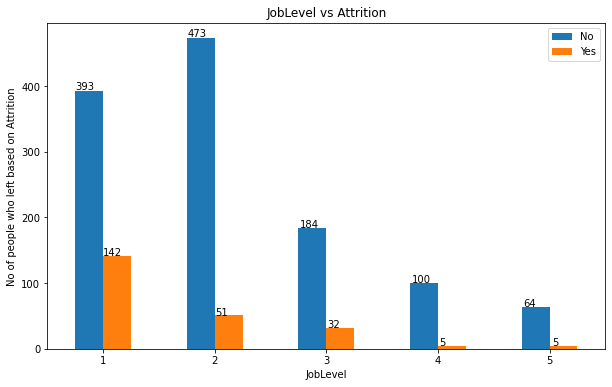

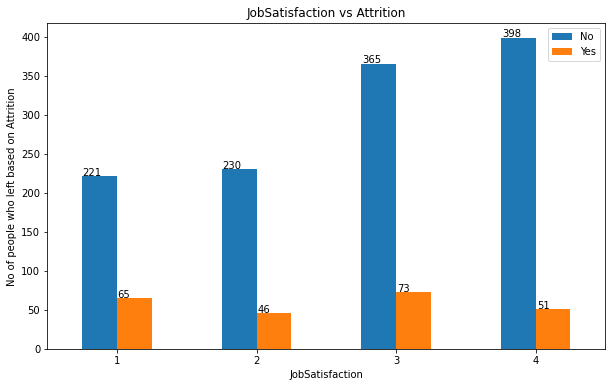

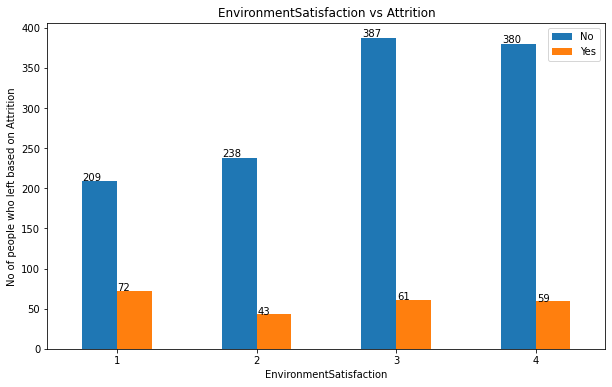

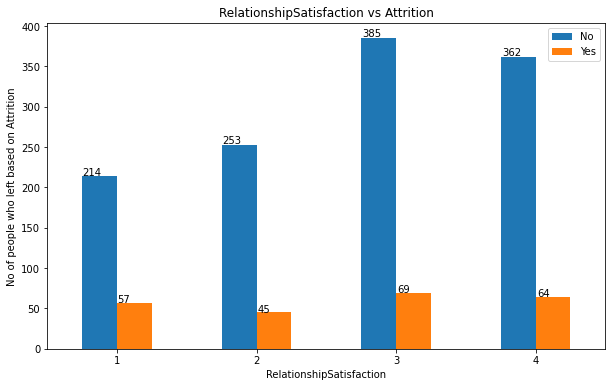

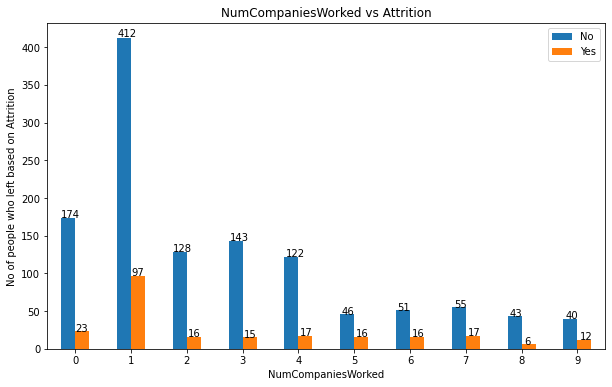

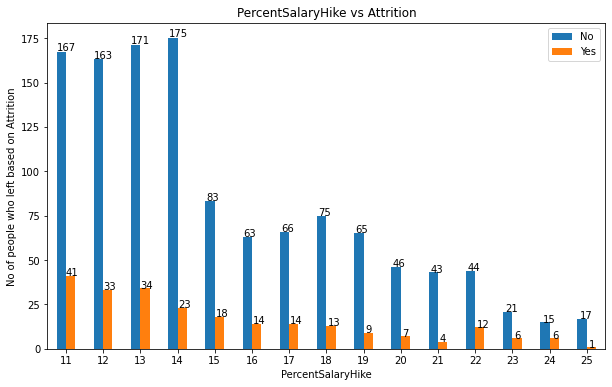

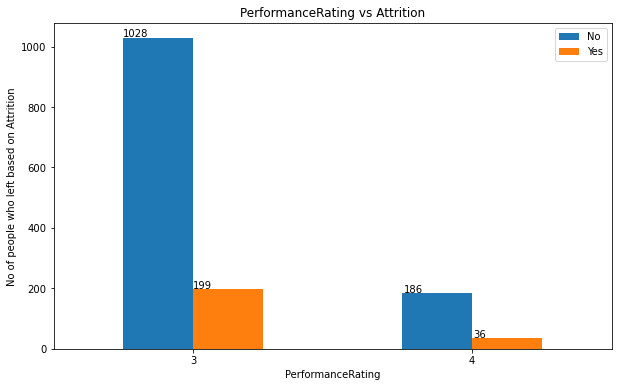

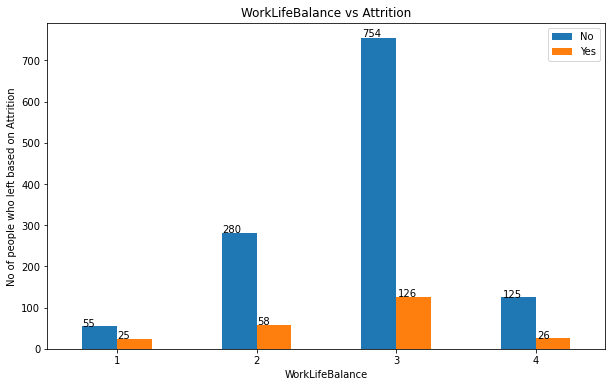

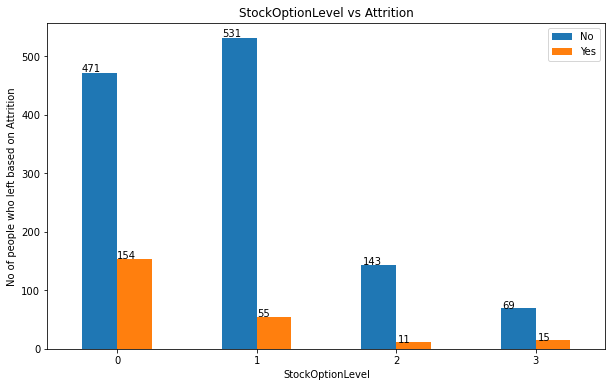

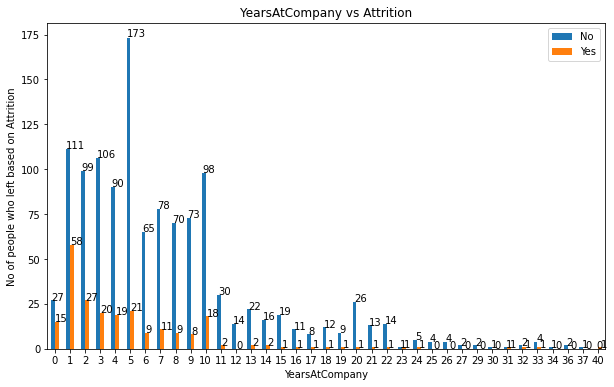

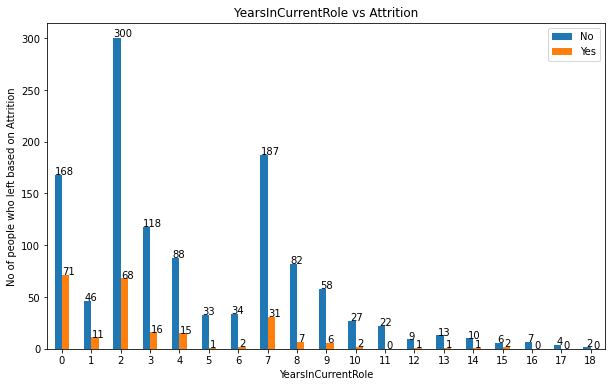

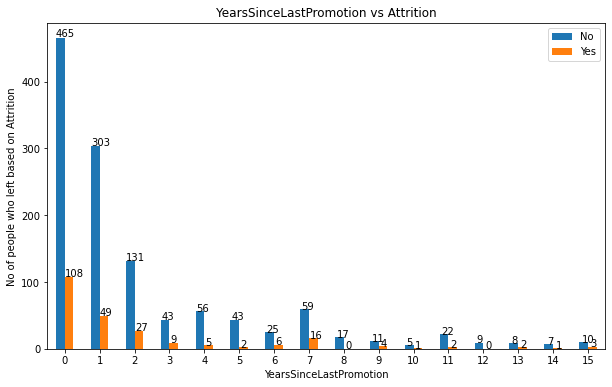

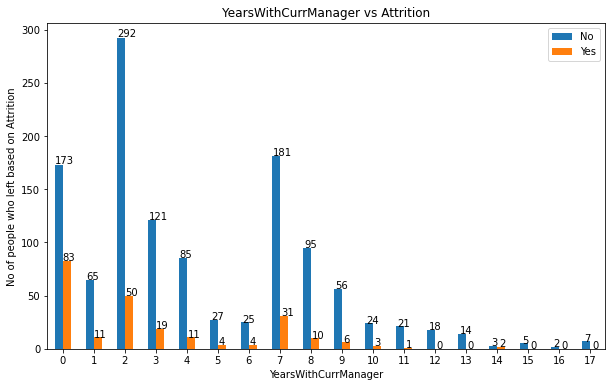

In [24]:
#Plots for Numeric data

crosstabplot(attrition_df,'JobInvolvement','Attrition')
crosstabplot(attrition_df,'JobLevel','Attrition')
crosstabplot(attrition_df,'JobSatisfaction','Attrition')
crosstabplot(attrition_df,'EnvironmentSatisfaction','Attrition')
crosstabplot(attrition_df,'RelationshipSatisfaction','Attrition')
crosstabplot(attrition_df,'NumCompaniesWorked','Attrition')
crosstabplot(attrition_df,'PercentSalaryHike','Attrition')
crosstabplot(attrition_df,'PerformanceRating','Attrition')
crosstabplot(attrition_df,'WorkLifeBalance','Attrition')
crosstabplot(attrition_df,'StockOptionLevel','Attrition')
crosstabplot(attrition_df,'YearsAtCompany','Attrition')
crosstabplot(attrition_df,'YearsInCurrentRole','Attrition')
crosstabplot(attrition_df,'YearsSinceLastPromotion','Attrition')
crosstabplot(attrition_df,'YearsWithCurrManager','Attrition')


0


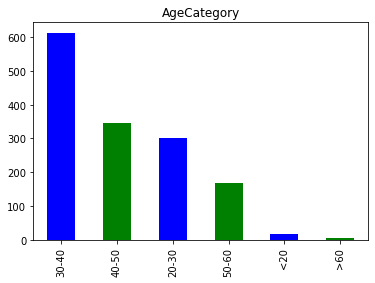

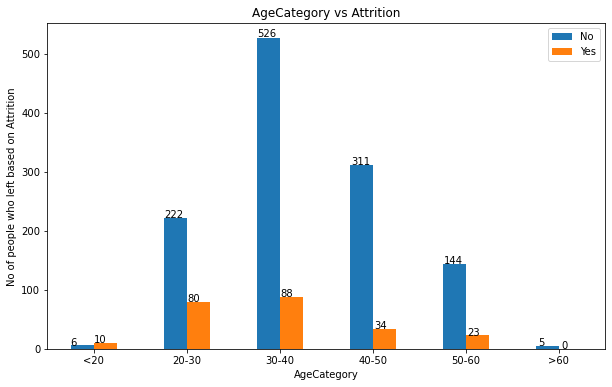

In [27]:
#Grouping age into category using binning method for better analysis on data distribution

attrition_df['AgeCategory'] = pd.cut(x=attrition_df['Age'], bins=[10,19,29,39,49,59,69],labels=['<20','20-30','30-40','40-50','50-60','>60'])
print(attrition_df['AgeCategory'].isnull().sum())
attrition_df['AgeCategory'].value_counts().plot(kind='bar',color=['Blue','Green'],title="AgeCategory")
crosstabplot(attrition_df,'AgeCategory','Attrition')



0


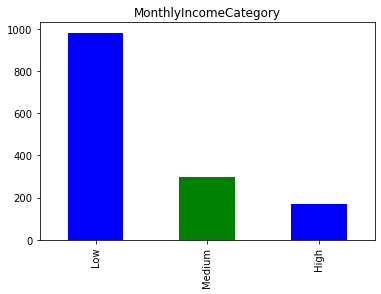

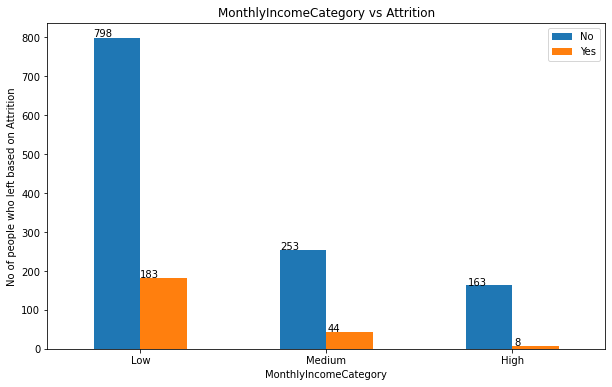

In [25]:
#Grouping MonthlyIncome into category using binning method for better analysis on data distribution
attrition_df['MonthlyIncomeCategory'] = pd.cut(x=attrition_df['MonthlyIncome'], bins=[0,6666,13333,19999],labels=['Low','Medium','High'])
print(attrition_df['MonthlyIncomeCategory'].isnull().sum())
attrition_df['MonthlyIncomeCategory'].value_counts().plot(kind='bar',color=['Blue','Green'],title="MonthlyIncomeCategory")
crosstabplot(attrition_df,'MonthlyIncomeCategory','Attrition')

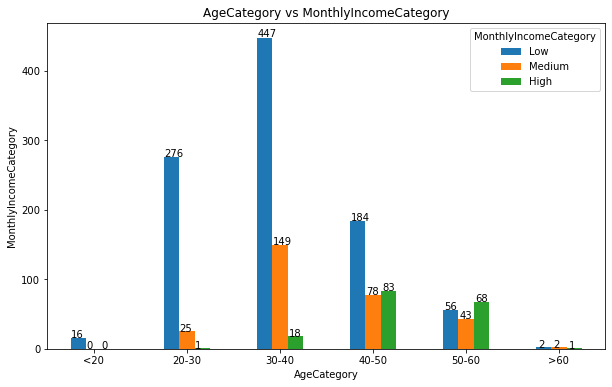

In [28]:
#Plot bar for Age Vz Monthly category for analysis of data

barplot = pd.crosstab(attrition_df['AgeCategory'],attrition_df['MonthlyIncomeCategory']).plot(kind="bar",figsize=(10,6))
plt.title("AgeCategory vs MonthlyIncomeCategory")
plt.xlabel("AgeCategory")
plt.ylabel("MonthlyIncomeCategory")
plt.xticks(rotation=0)
for patches in barplot.patches:
    barplot.annotate(str(patches.get_height()), (patches.get_x() * 1.005, patches.get_height() * 1.005))

In [29]:
#Plot catplot for multiple variable analysis of data
def multivariableplot(data,feature1,feature2,target):
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize=(10,8))
    multivariableplot=sns.catplot(x=feature1,y=feature2,data=data,kind='box',col=target,palette='plasma')
    multivariableplot.set_xticklabels(rotation=90)
    plt.show()

<Figure size 720x576 with 0 Axes>

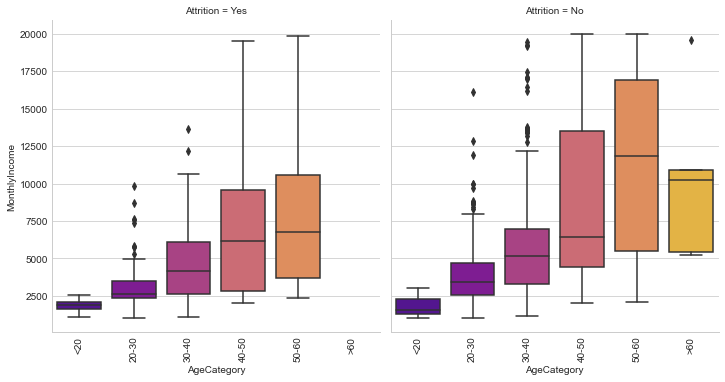

<Figure size 720x576 with 0 Axes>

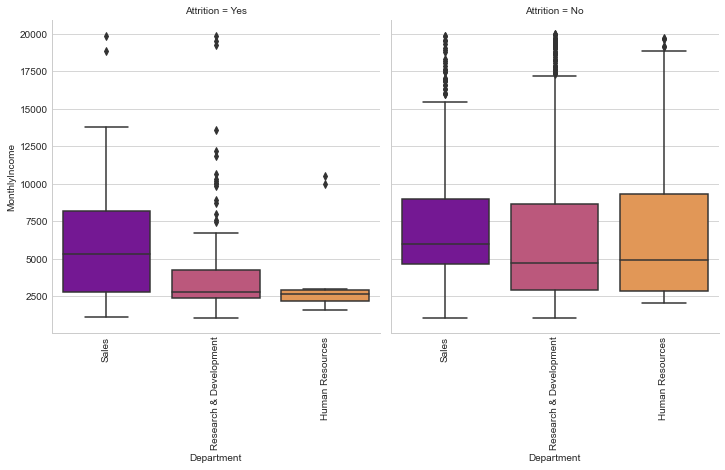

<Figure size 720x576 with 0 Axes>

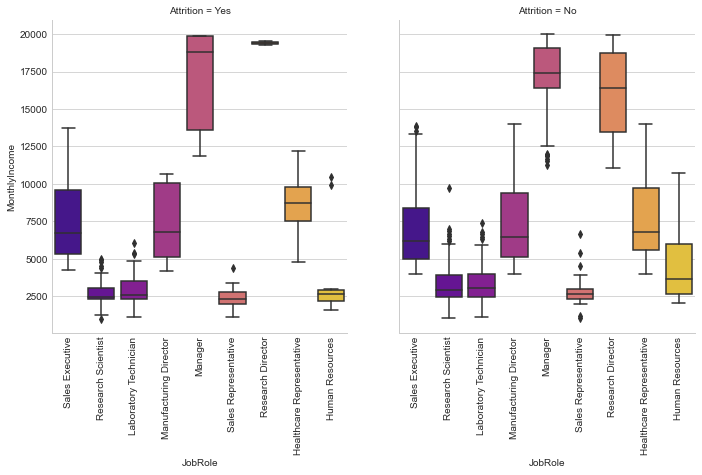

<Figure size 720x576 with 0 Axes>

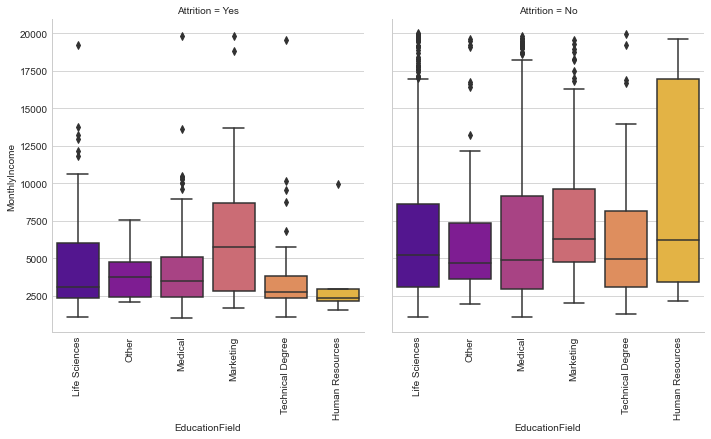

<Figure size 720x576 with 0 Axes>

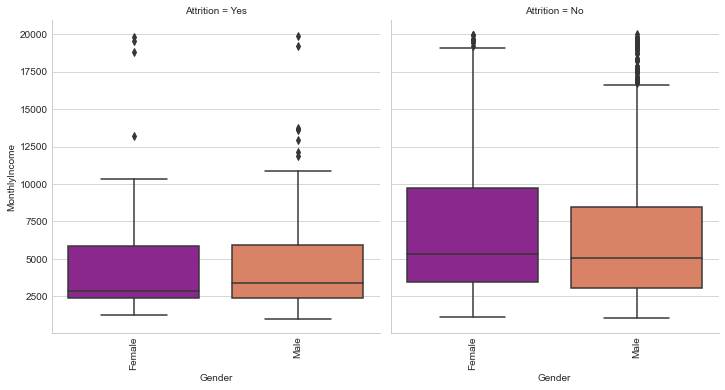

<Figure size 720x576 with 0 Axes>

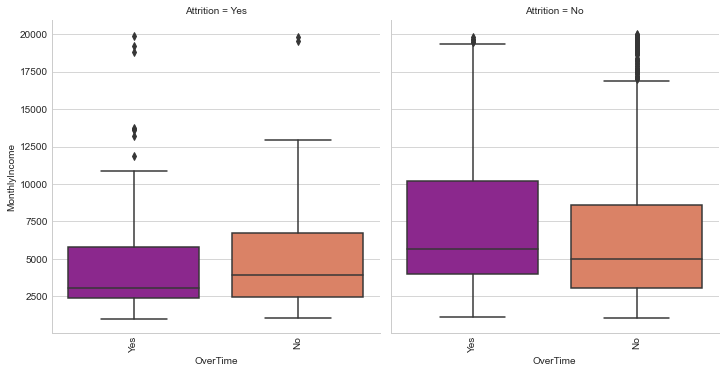

<Figure size 720x576 with 0 Axes>

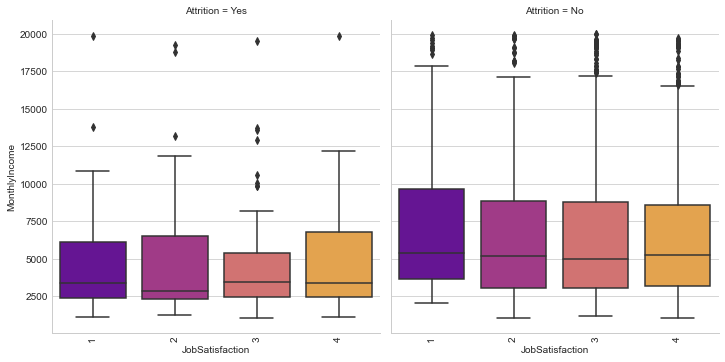

<Figure size 720x576 with 0 Axes>

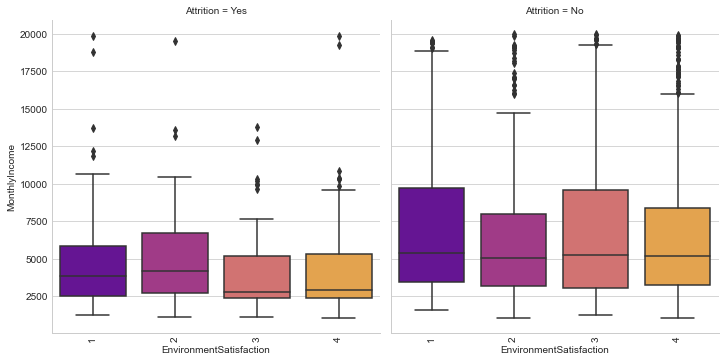

<Figure size 720x576 with 0 Axes>

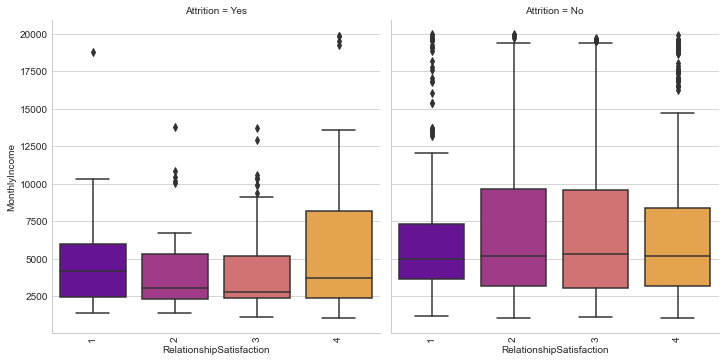

<Figure size 720x576 with 0 Axes>

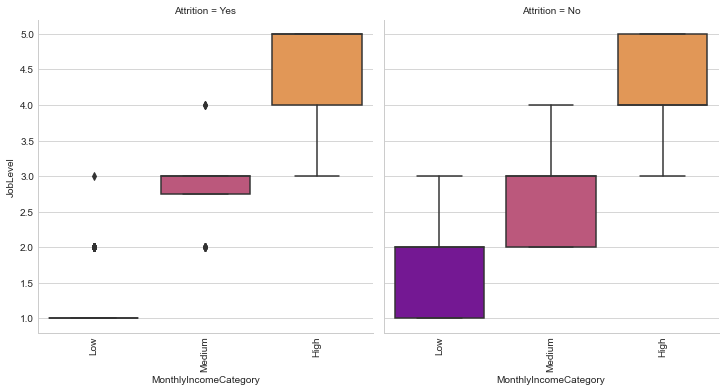

<Figure size 720x576 with 0 Axes>

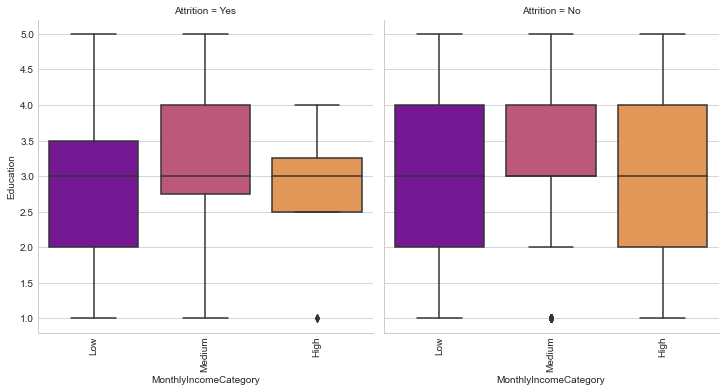

In [30]:
#Plot catplot for multiple variable analysis of data
multivariableplot(attrition_df,'AgeCategory','MonthlyIncome','Attrition')
multivariableplot(attrition_df,'Department','MonthlyIncome','Attrition')
multivariableplot(attrition_df,'JobRole','MonthlyIncome','Attrition')
multivariableplot(attrition_df,'EducationField','MonthlyIncome','Attrition')
multivariableplot(attrition_df,'Gender','MonthlyIncome','Attrition')
multivariableplot(attrition_df,'OverTime','MonthlyIncome','Attrition')
multivariableplot(attrition_df,'JobSatisfaction','MonthlyIncome','Attrition')
multivariableplot(attrition_df,'EnvironmentSatisfaction','MonthlyIncome','Attrition')
multivariableplot(attrition_df,'RelationshipSatisfaction','MonthlyIncome','Attrition')
multivariableplot(attrition_df,'MonthlyIncomeCategory','JobLevel','Attrition')
multivariableplot(attrition_df,'MonthlyIncomeCategory','Education','Attrition')

In [31]:
#Lets analyse jobrole with distance from home 
attrition_df.groupby(['JobRole','Attrition']).DistanceFromHome.mean().unstack()


Attrition,No,Yes
JobRole,,
Healthcare Representative,9.057851,17.666667
Human Resources,6.600000,13.416667
Laboratory Technician,9.196891,9.721311
Manager,7.989583,10.000000
Manufacturing Director,9.646617,8.800000
Research Director,8.474359,7.000000
Research Scientist,8.975104,9.765957
Sales Executive,9.003817,12.649123
Sales Representative,9.000000,8.250000


In [32]:
#Remove Employee Number & Over18
attrition_df.drop(columns='EmployeeNumber',inplace=True)
attrition_df.drop(columns='Over18',inplace=True)
print(attrition_df.columns)

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'MonthlyIncomeCategory', 'AgeCategory'],
      dtype='object')


In [33]:
#Load the categorical data column dtype='Object or bool' into new dataset

attrition_cat_data=[cat_data for cat_data in attrition_df.columns if attrition_df[cat_data].dtype == 'O']
attrition_cat_df=attrition_df[attrition_cat_data]
attrition_cat_df.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [34]:
#Encode categorical into numerical values for proper understanding of data during model building

attrition_cat_df=pd.get_dummies(attrition_cat_df,drop_first=True).astype(int)
attrition_cat_df.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


<h2>Modeling & Prediction</h2>

In [35]:
#Concate the categorical dummies data to form final dataset for modeling & prediction
Attrition_FinalDataSet=pd.concat([attrition_df,attrition_cat_df],axis=1)
Attrition_FinalDataSet.drop(columns=attrition_cat_data,inplace=True)
Attrition_FinalDataSet.drop(columns='AgeCategory',inplace=True)
Attrition_FinalDataSet.drop(columns='MonthlyIncomeCategory',inplace=True)
Attrition_FinalDataSet.head()
print(Attrition_FinalDataSet.columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole

In [36]:
#Rename the target variable in the final dataset
Attrition_FinalDataSet.rename(columns={"Attrition_Yes":'Attrition'},inplace=True)
print('Final Data set :{0}'.format(Attrition_FinalDataSet.shape))

Final Data set :(1449, 45)


In [37]:
#split the data in to 'x' and 'y'
x=Attrition_FinalDataSet.drop(columns='Attrition')
y=Attrition_FinalDataSet['Attrition']

In [38]:
y.value_counts() #Check the data is balanced or not 

0    1214
1     235
Name: Attrition, dtype: int64

                             Features  Importances
37          JobRole_Research Director     0.000761
35                    JobRole_Manager     0.001616
36     JobRole_Manufacturing Director     0.002943
30               EducationField_Other     0.002957
33            JobRole_Human Resources     0.003411
13                  PerformanceRating     0.005415
28           EducationField_Marketing     0.006706
31    EducationField_Technical Degree     0.006776
40       JobRole_Sales Representative     0.006896
39            JobRole_Sales Executive     0.007152
27       EducationField_Life Sciences     0.007270
38         JobRole_Research Scientist     0.007591
24       BusinessTravel_Travel_Rarely     0.007779
41              MaritalStatus_Married     0.008676
25  Department_Research & Development     0.008721
26                   Department_Sales     0.008833
29             EducationField_Medical     0.008906
34      JobRole_Laboratory Technician     0.009134
32                        Gende

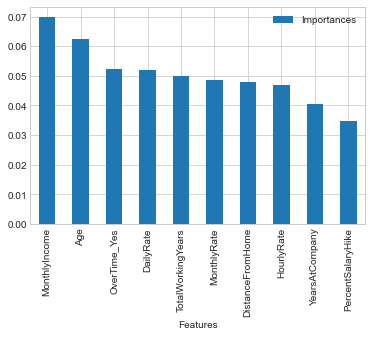

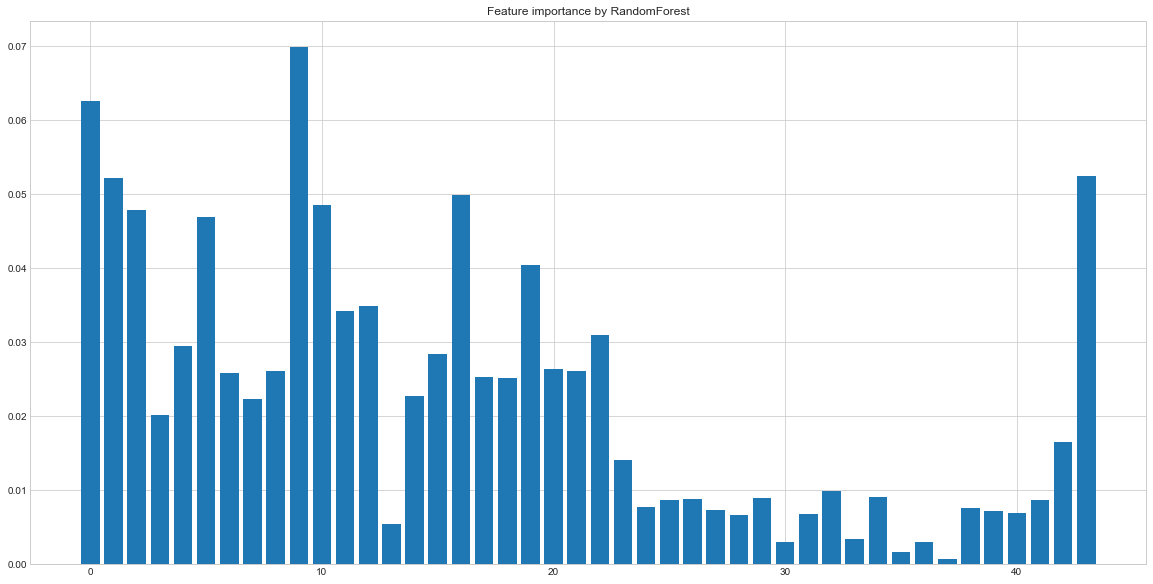

In [39]:
#Feature selection using RandomForestClassifier technique
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=340)
model.fit(x,y)
importances_random = model.feature_importances_

final_attrition_df=pd.DataFrame({"Features": x.columns,"Importances":importances_random})
final_attrition_df.set_index('Importances')
final_attrition_df= final_attrition_df.sort_values('Importances')
print(final_attrition_df)
final_attrition_df.nlargest(10,'Importances').plot.bar('Features','Importances')

plt.figure(figsize=(20,10))
plt.title('Feature importance by RandomForest')
plt.bar([x for x in range(len(importances_random))],importances_random)
plt.show()

[17:48:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
                             Features  Importances
33            JobRole_Human Resources     0.000000
37          JobRole_Research Director     0.000000
36     JobRole_Manufacturing Director     0.000000
13                  PerformanceRating     0.000000
30               EducationField_Other     0.003102
35                    JobRole_Manager     0.008594
41              MaritalStatus_Married     0.010010
27       EducationField_Life Sciences     0.012991
10                        MonthlyRate     0.013162
24       BusinessTravel_Travel_Rarely     0.014023
34      JobRole_Laboratory Technician     0.014988
32                        Gender_Male     0.016322
3                          

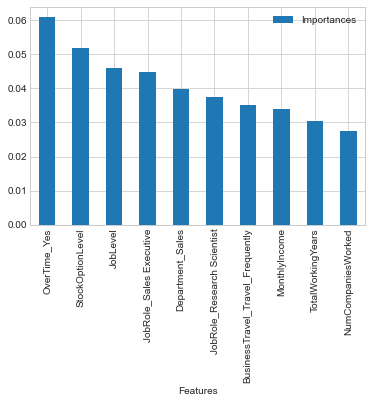

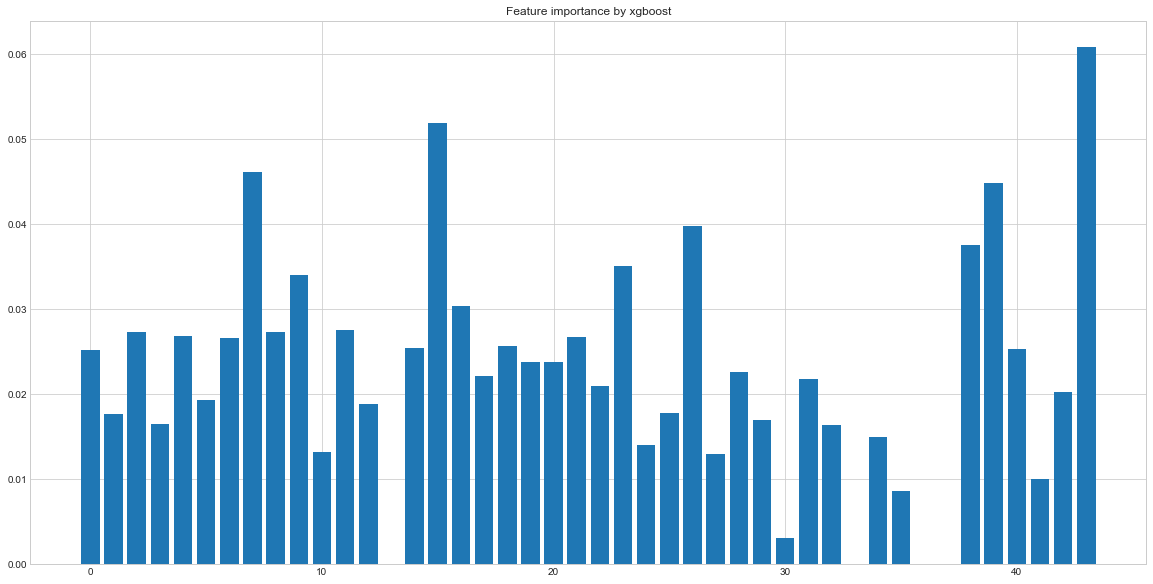

In [217]:
#Feature selection by xgboost technique
import xgboost
from xgboost import plot_importance
xgb=xgboost.XGBClassifier(use_label_encoder=False)
xgb.fit(x,y)

importances=xgb.feature_importances_
columns=x.columns

final_df_xg=pd.DataFrame({"Features": x.columns,"Importances":importances})
final_df_xg.set_index('Importances')
final_df_xg= final_df_xg.sort_values('Importances')
print(final_df_xg)

final_df_xg.nlargest(10,'Importances').plot.bar('Features','Importances')
plt.figure(figsize=(20,10))
plt.title('Feature importance by xgboost')
plt.bar([x for x in range(len(importances))],importances)
plt.show()
        

Training Data : (1159, 25)
Test Data : (290, 25)
Accuracy_score training data set: 0.8766177739430544
Accuracy_score: 0.8655172413793103
Classification Report:               precision    recall  f1-score   support

           0       0.86      1.00      0.93       243
           1       0.90      0.19      0.32        47

    accuracy                           0.87       290
   macro avg       0.88      0.59      0.62       290
weighted avg       0.87      0.87      0.83       290

Confusion Matrix: [[242   1]
 [ 38   9]]


<ipython-input-49-31ba71bf0bac>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


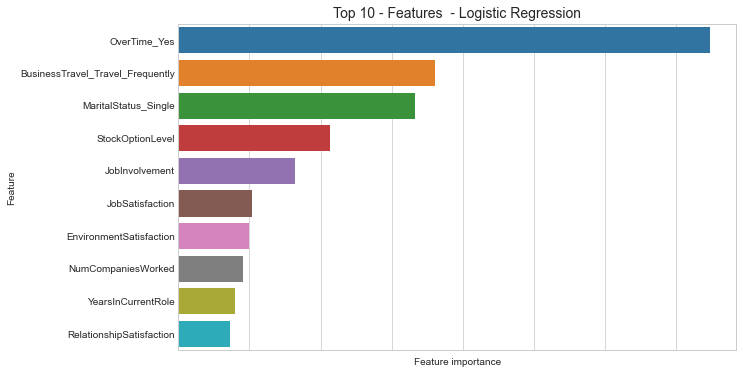

In [49]:
#Modeling & predicting using LogisticRegression - RandomForestClassifier feature selection technique
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
RandomForestDataSet =  Attrition_FinalDataSet
target = RandomForestDataSet['Attrition']
features = RandomForestDataSet.drop(columns=['Attrition','JobRole_Human Resources', 'JobRole_Laboratory Technician',
                                            'JobRole_Manager', 'JobRole_Manufacturing Director','JobRole_Research Director',
                                             'JobRole_Research Scientist','JobRole_Sales Executive',
                                             'JobRole_Sales Representative','EducationField_Life Sciences',
                                             'EducationField_Marketing','EducationField_Medical', 'EducationField_Other',
                                             'EducationField_Technical Degree','PerformanceRating',
                                             'Department_Research & Development', 'Department_Sales',
                                             'BusinessTravel_Travel_Rarely','Gender_Male','MaritalStatus_Married'], axis = 1)

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)
#Model and train creation
model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(X_train,y_train)
print('Training Data : {0}'.format(X_train.shape))
print('Test Data : {0}'.format(X_test.shape))

#predict the results for training model
log_pred_random_train = model.predict(X_train)
print('Accuracy_score training data set: {0}'.format(accuracy_score(y_train, log_pred_random_train)))
#predict the results for test model
log_pred_random = model.predict(X_test)
#test the accuracy of the prediction
accuracy_score(y_test, log_pred_random)

print('Accuracy_score: {0}'.format(accuracy_score(y_test,log_pred_random)))
print('Classification Report: {0}'.format(classification_report(y_test,log_pred_random)))
print('Confusion Matrix: {0}'.format(confusion_matrix(y_test,log_pred_random)))

log_coef = np.squeeze(abs(model.coef_)).tolist()
featureimp = pd.DataFrame({'Feature': list(X_train), 'Feature importance': log_coef})
featureimp = featureimp.sort_values(by='Feature importance',ascending=False).head(10)
plt.figure(figsize = (10,6))
plt.title('Top 10 - Features  - Logistic Regression',fontsize=14)
s = sns.barplot(y='Feature',x='Feature importance',data=featureimp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()


Training Data : (1159, 39)
Test Data : (290, 39)
Accuracy_score training data set: 0.8852459016393442
Accuracy_score: 0.8827586206896552
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.99      0.93       243
           1       0.84      0.34      0.48        47

    accuracy                           0.88       290
   macro avg       0.86      0.66      0.71       290
weighted avg       0.88      0.88      0.86       290

Confusion Matrix: [[240   3]
 [ 31  16]]


<ipython-input-45-a30c01d9b90a>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


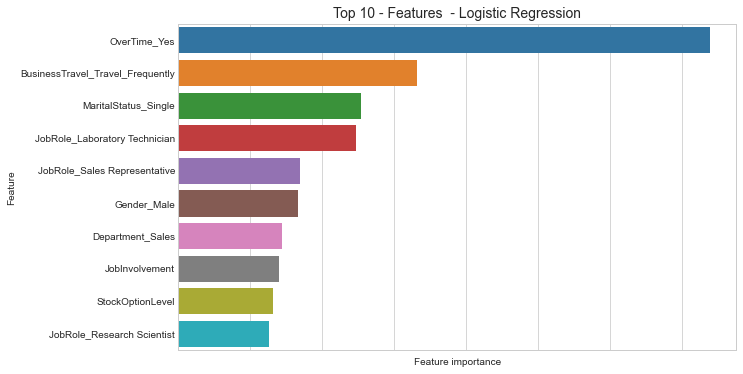

In [45]:
#Modeling & predicting using LogisticRegression - XGBoostDataSet feature selection technique
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics

XGBoostDataSet = Attrition_FinalDataSet
target = XGBoostDataSet['Attrition']
features = XGBoostDataSet.drop(columns=['Attrition','PerformanceRating','JobRole_Human Resources',
                                        'JobRole_Research Director','JobRole_Manufacturing Director', 'JobRole_Manager'], axis = 1)

#Train/test split creation
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)
print('Training Data : {0}'.format(X_train.shape))
print('Test Data : {0}'.format(X_test.shape))
#Model and train creation
model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(X_train,y_train)
#predict the results for training model
log_pred_XG = model.predict(X_train)
print('Accuracy_score training data set: {0}'.format(accuracy_score(y_train, log_pred_XG)))
#predict the results for test model
log_pred_XG = model.predict(X_test)
#test the accuracy
accuracy_score(y_test, log_pred_XG)

print('Accuracy_score: {0}'.format(accuracy_score(y_test,log_pred_XG)))
print('Classification Report: {0}'.format(classification_report(y_test,log_pred_XG)))
print('Confusion Matrix: {0}'.format(confusion_matrix(y_test,log_pred_XG)))

log_coef = np.squeeze(abs(model.coef_)).tolist()
featureimp = pd.DataFrame({'Feature': list(X_train), 'Feature importance': log_coef})
featureimp = featureimp.sort_values(by='Feature importance',ascending=False).head(10)
plt.figure(figsize = (10,6))
plt.title('Top 10 - Features  - Logistic Regression',fontsize=14)
s = sns.barplot(y='Feature',x='Feature importance',data=featureimp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

# Plot the decision boundary
#plt.title("Logistic Regression")
# Retrieve the model parameters.
#line_bias = model.intercept_
#line_w = model.coef_.T
#points_y=[(line_w[0]*x+line_bias)/(-1*line_w[1]) for x in X_test.values]
#plt.plot(X_test.values, points_y)
#plt.scatter(X_test[:,0], X_test[:,1],c=y_test,cmap='coolwarm', edgecolor='white', linewidth=0.3)
#plt.axis([5, 30, 0, 1])
#plt.show()

Training Data : (1159, 25)
Test Data : (290, 25)
Accuracy_score training data set: 1.0
Accuracy Score: 0.7758620689655172
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.87      0.87       243
           1       0.30      0.28      0.29        47

    accuracy                           0.78       290
   macro avg       0.58      0.57      0.58       290
weighted avg       0.77      0.78      0.77       290

Confusion Matrix: [[212  31]
 [ 34  13]]


<AxesSubplot:xlabel='Features'>

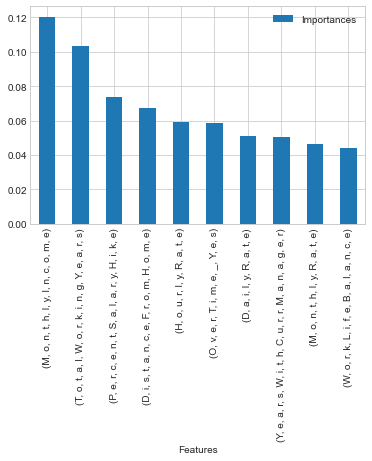

In [41]:
#Modeling & predicting using DecisionTree - RandomForest Classifier feature selection technique
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
RandomForestDataSet =  Attrition_FinalDataSet
target = RandomForestDataSet['Attrition']
features = RandomForestDataSet.drop(columns=['Attrition','JobRole_Human Resources', 'JobRole_Laboratory Technician',
                                            'JobRole_Manager', 'JobRole_Manufacturing Director','JobRole_Research Director',
                                             'JobRole_Research Scientist','JobRole_Sales Executive',
                                             'JobRole_Sales Representative','EducationField_Life Sciences',
                                             'EducationField_Marketing','EducationField_Medical', 'EducationField_Other',
                                             'EducationField_Technical Degree','PerformanceRating',
                                             'Department_Research & Development', 'Department_Sales',
                                             'BusinessTravel_Travel_Rarely','Gender_Male','MaritalStatus_Married'], axis = 1)

#create the train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)
#Create the model and train
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

print('Training Data : {0}'.format(X_train.shape))
print('Test Data : {0}'.format(X_test.shape))

#predict the results for training model
DT_random_train = DT.predict(X_train)
print('Accuracy_score training data set: {0}'.format(accuracy_score(y_train, DT_random_train)))

#predict the results for test
test_predDT_RF = DT.predict(X_test)
#test the accuracy
print('Accuracy Score: {0}'.format(accuracy_score(y_test, test_predDT_RF)))

print('Classification Report: {0}'.format(classification_report(y_test,test_predDT_RF)))
print('Confusion Matrix: {0}'.format(confusion_matrix(y_test,test_predDT_RF)))

importances=DT.feature_importances_

final_attrition_df=pd.DataFrame({"Features": features,"Importances":importances})
final_attrition_df.set_index('Importances')
final_attrition_df= final_attrition_df.sort_values('Importances')
final_attrition_df.nlargest(10,'Importances').plot.bar('Features','Importances')



Training Data : (1159, 39)
Test Data : (290, 39)
Accuracy_score training data set: 1.0
Accuracy Score: 0.7793103448275862
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.86      0.87       243
           1       0.34      0.38      0.36        47

    accuracy                           0.78       290
   macro avg       0.61      0.62      0.61       290
weighted avg       0.79      0.78      0.78       290

Confusion Matrix: [[208  35]
 [ 29  18]]


<AxesSubplot:xlabel='Features'>

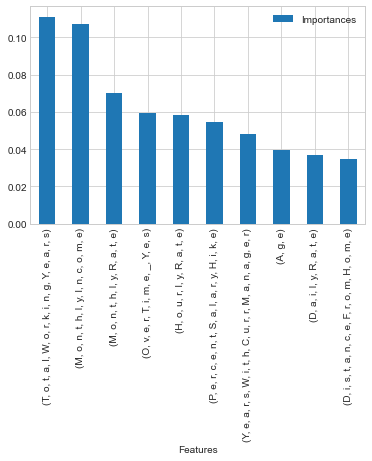

In [43]:
#Modeling & predicting using DecisionTree - XGBoostDataSet feature selection technique
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
XGBoostDataSet = Attrition_FinalDataSet
target = XGBoostDataSet['Attrition']
features = XGBoostDataSet.drop(columns=['Attrition','PerformanceRating','JobRole_Human Resources',
                                        'JobRole_Research Director','JobRole_Manufacturing Director', 'JobRole_Manager'], axis = 1)

#Train/test split creation
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)
#Model and train creation
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
#predict the results for test model
test_predDT = DT.predict(X_test)

print('Training Data : {0}'.format(X_train.shape))
print('Test Data : {0}'.format(X_test.shape))

#predict the results for training model
DT_XG_train = DT.predict(X_train)
print('Accuracy_score training data set: {0}'.format(accuracy_score(y_train, DT_XG_train)))

#test the accuracy
print('Accuracy Score: {0}'.format(accuracy_score(y_test, test_predDT)))
print('Classification Report: {0}'.format(classification_report(y_test,test_predDT)))
print('Confusion Matrix: {0}'.format(confusion_matrix(y_test,test_predDT)))

importances=DT.feature_importances_

final_attrition_df=pd.DataFrame({"Features": features,"Importances":importances})
final_attrition_df.set_index('Importances')
final_attrition_df= final_attrition_df.sort_values('Importances')
final_attrition_df.nlargest(10,'Importances').plot.bar('Features','Importances')



In [46]:
#Setting values of accuracy for plotting
model_scores_Random={'Logistic Regression - Random':accuracy_score(y_test,log_pred_random),'Decision tree - Random':accuracy_score(y_test, test_predDT_RF)
              }
model_scores_XGBoost={'Logistic Regression - XG':accuracy_score(y_test,log_pred_XG),'Decision tree - XG':accuracy_score(y_test, test_predDT)
              }
print(model_scores_Random)
print(model_scores_XGBoost)


{'Logistic Regression - Random': 0.8655172413793103, 'Decision tree - Random': 0.7758620689655172}
{'Logistic Regression - XG': 0.8827586206896552, 'Decision tree - XG': 0.7793103448275862}


<AxesSubplot:>

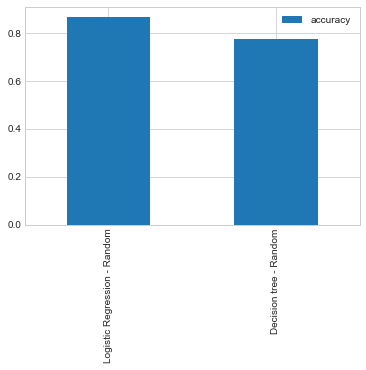

In [47]:
#Comparison of accuracy for logistic regression & Decision tree using RandomForest classifier feature selection technique
model_compare=pd.DataFrame(model_scores_Random,index=['accuracy'])
model_compare
model_compare.T.plot(kind='bar')

<AxesSubplot:>

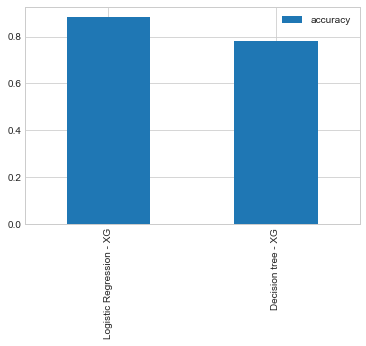

In [50]:
#Comparison of accuracy for logistic regression & Decision tree using XGBoost feature selection technique
model_compare=pd.DataFrame(model_scores_XGBoost,index=['accuracy'])
model_compare
model_compare.T.plot(kind='bar')